In [1]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functools import reduce
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

# Data read

In [8]:
#read data file
df = pd.read_csv('../data/init_enrollment-2010-2012/PreprocessedSubjects_new.csv')
df2 = pd.read_csv('../data/init_enrollment-2010-2012/PreprocessedMedications_new.csv')
df3 = pd.read_csv('../data/init_enrollment-2010-2012/PreprocessedMedical Conditions_new.csv')
df4 = pd.read_csv('../data/init_enrollment-2010-2012/PreprocessedLabs_new.csv')
df5 = pd.read_csv('../data/init_enrollment-2010-2012/PreprocessedHbA1c_new.csv')

print('all variables:',  df.shape[1]+df2.shape[1]+df3.shape[1]+df4.shape[1]+df5.shape[1] )

print('Size of dataframe = ', df.shape)
df.head(5)


/home/kali/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (5,58,97,346,361,363) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/kali/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (44) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


366
3
72
47
5
all variables: 493
Size of dataframe =  (25759, 366)


,PtID,ParticipantFormType,Pt_InitTrt,Pt_SevHypoEver,Pt_HospDKASinceDiag,Pt_NumHospDKA,Pt_InsulinRecMethod,Pt_InsHumalog,Pt_InsNovolog,Pt_InsApidra,...,InsLevemir,InsLantus,InsOther,InsUnk,InsNotTaking,AgeAtConsent,DiagAge,Pt_v3NumERVisOthReas,Pt_v3NumHospOthReas,Pt_v3NumSHSeizComa
0,3963,Self,2.Pill(s)/Oral medication,2.No,2.No,0,1.Pump,NaN,1.0,NaN,...,0,0,0,0,0,36.0876,24,0,0,0
1,7428,Parent,"1.Insulin given by injections, pen or pump",2.No,1.Yes,1,1.Pump,NaN,1.0,NaN,...,0,0,1,0,0,10.1465,4,0,0,0
2,15755,Parent,"1.Insulin given by injections, pen or pump",2.No,1.Yes,0,1.Pump,NaN,1.0,NaN,...,0,0,1,0,0,10.1465,2,0,0,0
3,1489,Parent,"1.Insulin given by injections, pen or pump",2.No,2.No,0,1.Pump,NaN,1.0,NaN,...,0,0,1,0,0,9.1745,4,0,0,0
4,12505,Self,"1.Insulin given by injections, pen or pump",1.Yes,2.No,0,1.Pump,1.0,NaN,NaN,...,0,0,0,0,0,58.1684,24,0,0,0


In [3]:
gender_groupby = df.groupby('Gender', as_index=False).agg(total= ('PtID','count'))
print(gender_groupby)

gender_groupby['total']/(gender_groupby['total'][0]+gender_groupby['total'][1]+gender_groupby['total'][2])

  Gender  total
0      F  12903
1      M  12851
2      T      5


0    0.500912
1    0.498894
2    0.000194
Name: total, dtype: float64

<AxesSubplot:ylabel='total'>

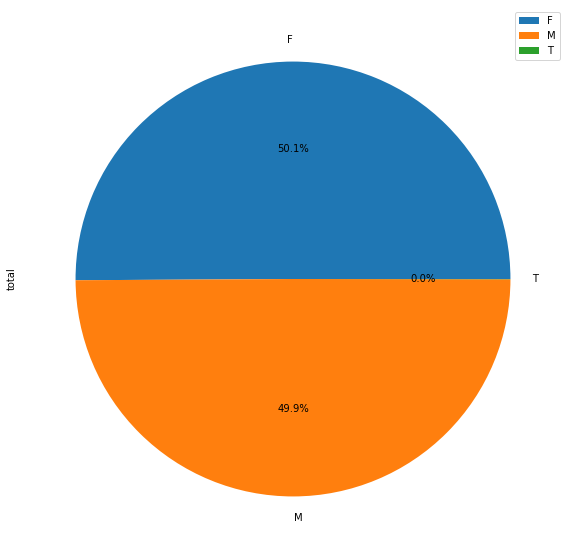

In [4]:
gender_groupby.groupby(['Gender']).sum().plot(kind='pie', y='total', figsize=(15,10), autopct='%1.1f%%')

In [5]:
race_groupby = df.groupby('Pt_RaceEth', as_index=False).agg(total= ('PtID','count'))
print(race_groupby)

                                 Pt_RaceEth  total
0                      1.White Non-Hispanic  21141
1                      2.Black Non-Hispanic   1314
2                      3.Hispanic or Latino   2049
3  4.Native Hawaiian/Other Pacific Islander     41
4                                   5.Asian    303
5          6.American Indian/Alaskan Native     91
6                      7.More than one race    721


In [6]:
race_groupby['total']/(race_groupby['total'][0]+race_groupby['total'][1]+race_groupby['total'][2] + 
                       race_groupby['total'][3]+race_groupby['total'][4]+race_groupby['total'][5] +
                      race_groupby['total'][6])

0    0.823889
1    0.051208
2    0.079852
3    0.001598
4    0.011808
5    0.003546
6    0.028098
Name: total, dtype: float64

In [7]:
df['AgeAtConsent'] = df['AgeAtConsent'].replace({'90 or older': 91})
df['AgeAtConsent'] = df['AgeAtConsent'].astype(float)

age_at_consent = df['AgeAtConsent']
diag_age = df["DiagAge"]
diagDuration = age_at_consent - diag_age

df['diagDuration'] = diagDuration
df2 = df[["DiagAge","diagDuration", "AgeAtConsent"]].mean()
df2

DiagAge         11.609263
diagDuration    11.436448
AgeAtConsent    23.045710
dtype: float64

In [ ]:
bins=[0,10,20,30,40,50]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50','>=50']
binned_values = np.histogram(df['DiagAge'], bins=bins)[0].tolist() # use [0] to just get the counts
df_hist = pd.DataFrame.from_dict(dict(zip(labels, binned_values)), orient='index').reset_index()
df_hist.columns = ['ranges', 'counts']

In [ ]:
# histplot = pd.DataFrame.hist(df, column='DiagAge', bins=bins, grid=False)
ax = df.hist(column='DiagAge', bins=bins, grid=False, figsize=(6,7), color='#000000', zorder=2, rwidth=0.65)
plt.title('T1D duration of participants')
plt.xlabel('Duration (years)')
plt.ylabel('Number of participants')
plt.tight_layout()

In [ ]:
df = pd.DataFrame(df)
df2 = pd.DataFrame(df2)

import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
sns.histplot(data=df, x="diagDuration", bins=20, color='navy')
plt.savefig('diagduration.png')
plt.show()




In [ ]:
df_dur = df[(df['diagDuration'] < 1)]
less1 = df_dur.shape[0]

df_dur = df[(df['diagDuration'] >=1) & (df['diagDuration'] < 3 ) ]
less3 = df_dur.shape[0]

df_dur = df[(df['diagDuration'] >=3) & (df['diagDuration'] < 5 ) ]
less5 = df_dur.shape[0]


df_dur = df[(df['diagDuration'] >=5) & (df['diagDuration'] < 10 ) ]
less10 = df_dur.shape[0]

df_dur = df[(df['diagDuration'] >=10) & (df['diagDuration'] < 20 ) ]
less20 = df_dur.shape[0]

df_dur = df[(df['diagDuration'] >=20) & (df['diagDuration'] < 30) ]
less30 = df_dur.shape[0]


df_dur = df[(df['diagDuration'] >=30) & (df['diagDuration'] < 40 ) ]
less40 = df_dur.shape[0]


df_dur = df[(df['diagDuration'] >=40) & (df['diagDuration'] < 50) ]
less50 = df_dur.shape[0]

df_dur = df[(df['diagDuration'] >=50) ]
less100 = df_dur.shape[0]

list_dur = [less1, less3, less5, less10, less20, less30, less40,less50,less100]
print(list_dur)
labels = ['0-1','0-3','3-5','5-10', '10-20', '20-30', '30-40', '40-50','>=50']

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(x=labels, y=list_dur, color="salmon", saturation=.5)
plt.title('T1D duration of participants')
plt.xlabel('Duration (years)')
plt.ylabel('Number of participants')
plt.savefig('diagduration.png')
plt.show()

In [ ]:
df_dur = df[(df['diagDuration'] >= 40)]
df_dur.shape[0]

In [ ]:
df_dur = df[(df['DiagAge'] < 5)]
less1 = df_dur.shape[0]


df_dur = df[(df['DiagAge'] >=5) & (df['DiagAge'] < 10 ) ]
less510 = df_dur.shape[0]

df_dur = df[(df['DiagAge'] >=10) & (df['DiagAge'] < 18 ) ]
less3 = df_dur.shape[0]

df_dur = df[(df['DiagAge'] >=18) & (df['DiagAge'] < 26 ) ]
less5 = df_dur.shape[0]


df_dur = df[(df['DiagAge'] >=26) & (df['DiagAge'] < 40 ) ]
less10 = df_dur.shape[0]

df_dur = df[(df['DiagAge'] >=40) & (df['DiagAge'] < 65 ) ]
less20 = df_dur.shape[0]

df_dur = df[(df['DiagAge'] >=65)]
less30 = df_dur.shape[0]

list_dur = [less1,less510, less3, less5, less10, less20, less30]
list_dur
labels = ['0-5','5-10','10-18','18-26','26-40', '40-65', '>=65']

fig, ax = plt.subplots(figsize=(6,5))
ax = sns.barplot(x=labels, y=list_dur, color="salmon", saturation=.5)
plt.title('Age at diagnosis with T1D')
plt.xlabel('Age (years)')
plt.ylabel('Number of participants')
plt.savefig('diagage.png',  bbox_inches = "tight")
plt.show()

In [ ]:
df_dur = df[(df['DiagAge'] <18)]
df_dur.shape[0]
(df_dur.shape[0]/df.shape[0])*100

In [ ]:
df_sh = df[(df['SHSeizComaPast12mos'] == '1.Yes')]
lab = 'diagDuration'
print(df_sh.shape[0])

df_dur = df_sh[(df_sh['HbA1c'] < 5.7)]
less1 = df_dur.shape[0]

df_dur1 = df_sh[(df_sh['HbA1c'] >=5.7) & (df_sh['HbA1c'] < 6.5 ) ]
less57 = df_dur1.shape[0]


df_dur2 = df_sh[(df_sh['HbA1c'] >=6.5) & (df_sh['HbA1c'] < 7.5 ) ]
less510 = df_dur2.shape[0]

df_dur3 = df_sh[(df_sh['HbA1c'] >=7.5) & (df_sh['HbA1c'] < 10 ) ]
less3 = df_dur3.shape[0]

df_dur4 = df_sh[(df_sh['HbA1c'] >=10) ]
less5 = df_dur4.shape[0]



list_dur = [less1,less57,less510, less3, less5]
list_dur
labels = ['< 5.7','5.7-6.5','6.5-7.5','7.5-10','>= 10']

fig, ax = plt.subplots(figsize=(6,5))
ax = sns.barplot(x=labels, y=list_dur, color="salmon", saturation=.5)
plt.ylabel('Number  of participants')

plt.title('Mean HbA1c')
plt.xlabel('HbA1c %')
plt.savefig('hba1cdiag.png',  bbox_inches = "tight")
plt.show()



In [ ]:
df_sh = df[(df['DKAPast12mos'] == '1.Yes')]
print(df_sh.shape[0])
lab='diagDuration'
# (df_dur.shape[0]/df.shape[0])*100
df_sh1 = df_sh[(df_sh[lab] < 1)]
less1 = df_sh1.shape[0]

df_sh1 = df_sh[(df_sh[lab] >=1) & (df_sh[lab] < 3 ) ]
less3 = df_sh1.shape[0]

df_sh1 = df_sh[(df_sh[lab] >=3) & (df_sh[lab] < 5 ) ]
less5 = df_sh1.shape[0]


df_sh1 = df_sh[(df_sh[lab] >=5) & (df_sh[lab] < 10 ) ]
less10 = df_sh1.shape[0]

df_sh1 = df_sh[(df_sh[lab] >=10) & (df_sh[lab] < 20 ) ]
less20 = df_sh1.shape[0]

df_sh1 = df_sh[(df_sh[lab] >=20) & (df_sh[lab] < 30) ]
less30 = df_sh1.shape[0]


df_sh1 = df_sh[(df_sh[lab] >=30) & (df_sh[lab] < 40 ) ]
less40 = df_sh1.shape[0]


df_sh1 = df_sh[(df_sh[lab] >=40) & (df_sh[lab] < 50) ]
less50 = df_sh1.shape[0]

df_sh1 = df_sh[(df_sh[lab] >=50) ]
less100 = df_sh1.shape[0]

list_dur = [less1, less3, less5, less10, less20, less30, less40,less50,less100]
print(list_dur)
labels = ['0-1','0-3','3-5','5-10', '10-20', '20-30', '30-40', '40-50','>=50']

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(x=labels, y=list_dur, color="salmon", saturation=.5)
plt.title('T1D duration of participants')
plt.xlabel('Duration (years)')
plt.ylabel('Number of participants')
plt.savefig('diagduration.png')
plt.show()



In [ ]:
df_sh

In [ ]:
df.groupby('Gender').DiagAge.hist()

In [ ]:


df['bins'] = pd.cut(df['diagDuration'],bins=[0,9,19,29,39,95], labels=["0 - <10","10 - <20","20 - <30", "30 - <40", ">= 40"])

a = df.groupby('bins').size()



a.plot.pie(figsize=(10,10), autopct='%1.1f%%')

# gender_groupby.groupby(['Gender']).sum().plot(kind='pie', y='total', figsize=(15,10), autopct='%1.1f%%')

In [ ]:
a

In [ ]:
df.value_counts(["Height", "Weight"])

In [ ]:

df['bins'] = pd.cut(df['DiagAge'],bins=[0,9,17,25,39,64,93], labels=["0 - <10","10 - <18","18 - <26", "26 - <40", "40 - <65", ">=65"])

a = df.groupby('bins').size()



a.plot.pie(figsize=(10,10), autopct='%1.1f%%')

# gender_groupby.groupby(['Gender']).sum().plot(kind='pie', y='total', figsize=(15,10), autopct='%1.1f%%')

In [ ]:
a

In [ ]:
list_uni = []
for i in df.columns:
    if (0 not in df[i].unique() and (1. in df[i].unique()) and (df[i].unique().size == 2) ):
        list_uni.append(i)

df.update(df[list_uni].fillna(0))

#### Count null value percentage in each column

In [ ]:
# 'Pt_InsMedicare', 'Pt_InsMediGap', 'Pt_InsMedicaid', 'Pt_InsSCHIP', 
#                'Pt_InsMilitary', 'Pt_InsIndian', 'Pt_InsState', 'Pt_InsOtherGov', 'Pt_InsSingleService',
#                'Pt_InsNoCoverage', 'Pt_InsUnknown', 'Pt_InsNoAns'
df['Pt_CeliacDr'].value_counts()

<AxesSubplot:>

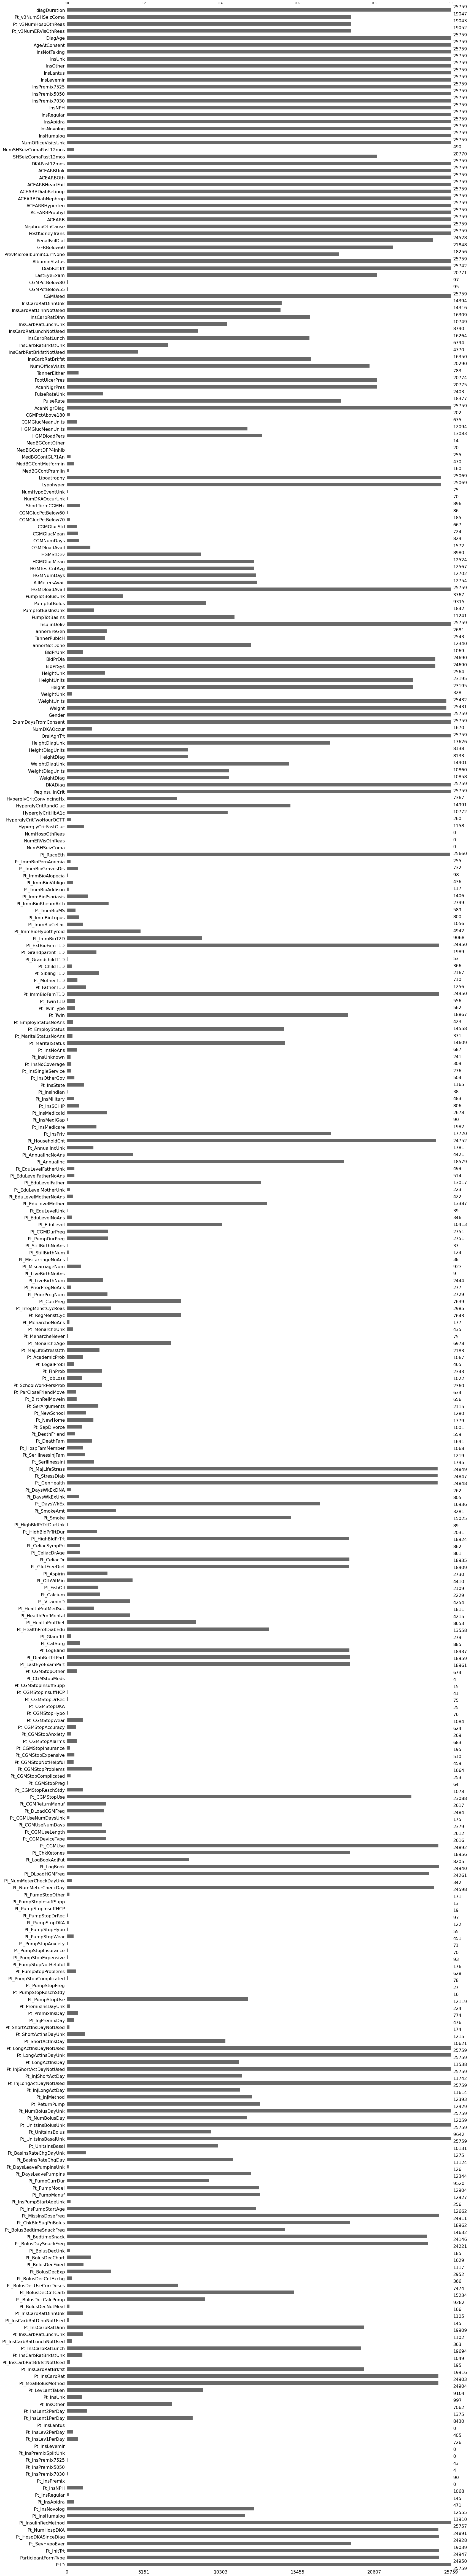

In [8]:
# missing values
import missingno as msno
msno.bar(df)

In [9]:
pd.options.display.max_rows = 100

def get_missing_val_percentage(df):
    return (df.isnull().sum()* 100 / len(df))


missing_per = get_missing_val_percentage(df)

# get missing values < threshold feature name list
variables = df.columns
thresh = 60
variable = [ ]
var = []
for i in range(df.columns.shape[0]):
    if missing_per[i]<= thresh: #setting the threshold as 40%
        variable.append(variables[i])
    else :
        var.append(variables[i])
        
print("variables missing vals < threshold")     
print(variable)
print("Length: ", len(variable))

print()
print("variables missing vals > threshold")     
print(var)
print("Length: ", len(var))

variables missing vals < threshold
['PtID', 'ParticipantFormType', 'Pt_InitTrt', 'Pt_SevHypoEver', 'Pt_HospDKASinceDiag', 'Pt_NumHospDKA', 'Pt_InsulinRecMethod', 'Pt_InsHumalog', 'Pt_InsNovolog', 'Pt_MealBolusMethod', 'Pt_InsCarbRat', 'Pt_InsCarbRatBrkfst', 'Pt_InsCarbRatLunch', 'Pt_InsCarbRatDinn', 'Pt_BolusDecCntCarb', 'Pt_BolusDaySnackFreq', 'Pt_BedtimeSnack', 'Pt_BolusBedtimeSnackFreq', 'Pt_ChkBldSugPriBolus', 'Pt_MissInsDoseFreq', 'Pt_InsPumpStartAge', 'Pt_PumpManuf', 'Pt_PumpModel', 'Pt_DaysLeavePumpIns', 'Pt_BasInsRateChgDay', 'Pt_UnitsInsBasalUnk', 'Pt_UnitsInsBolusUnk', 'Pt_NumBolusDay', 'Pt_NumBolusDayUnk', 'Pt_ReturnPump', 'Pt_InjMethod', 'Pt_InjLongActDay', 'Pt_InjLongActDayNotUsed', 'Pt_InjShortActDay', 'Pt_InjShortActDayNotUsed', 'Pt_LongActInsDay', 'Pt_LongActInsDayUnk', 'Pt_LongActInsDayNotUsed', 'Pt_ShortActInsDay', 'Pt_PumpStopUse', 'Pt_NumMeterCheckDay', 'Pt_DLoadHGMFreq', 'Pt_LogBook', 'Pt_ChkKetones', 'Pt_CGMUse', 'Pt_CGMStopUse', 'Pt_LastEyeExamPart', 'Pt_DiabRetT

In [10]:
def add_stress_column(row):
    if(row['Pt_MajLifeStress'] == '1.Yes' or row['Pt_HospFamMember'] == 1 or row['Pt_DeathFam'] == 1 or
           row['Pt_DeathFriend'] == 1 or row['Pt_SepDivorce'] == 1 or row['Pt_NewHome'] == 1 or
           row['Pt_NewSchool'] == 1 or row['Pt_ParCloseFriendMove'] == 1 or row['Pt_SchoolWorkPersProb'] == 1 or
           row['Pt_JobLoss'] == 1 or row['Pt_FinProb'] == 1 or row['Pt_LegalProbl'] == 1 or
           row['Pt_AcademicProb'] == 1 or row['Pt_MajLifeStressOth'] == 1):
        val = 1
    else:
        val = 0
    return val

df['MajorLifeStressEvent'] = df.apply(add_stress_column, axis=1)


In [11]:
# add HbA1C values from hba1c data table

df_hba1c = pd.read_csv('../data/init_enrollment-2010-2012/PreprocessedHbA1c_new.csv')

df_hba1c['mean_hba1c'] = df_hba1c['HbA1c'].groupby(df_hba1c['PtID']).transform('mean')

df_hba1c = df_hba1c.loc[df_hba1c.groupby(['PtID'])['HbA1cMonthsFromConsent'].idxmax()]

df["HbA1c"] = df_hba1c.merge(df, on="PtID")["mean_hba1c"]
df

,PtID,ParticipantFormType,Pt_InitTrt,Pt_SevHypoEver,Pt_HospDKASinceDiag,Pt_NumHospDKA,Pt_InsulinRecMethod,Pt_InsHumalog,Pt_InsNovolog,Pt_InsApidra,...,InsUnk,InsNotTaking,AgeAtConsent,DiagAge,Pt_v3NumERVisOthReas,Pt_v3NumHospOthReas,Pt_v3NumSHSeizComa,diagDuration,MajorLifeStressEvent,HbA1c
0,3963,Self,2.Pill(s)/Oral medication,2.No,2.No,0,1.Pump,NaN,1.0,NaN,...,0,0,36.0876,24,0,0,0,12.0876,0,7.675000
1,7428,Parent,"1.Insulin given by injections, pen or pump",2.No,1.Yes,1,1.Pump,NaN,1.0,NaN,...,0,0,10.1465,4,0,0,0,6.1465,0,6.750000
2,15755,Parent,"1.Insulin given by injections, pen or pump",2.No,1.Yes,0,1.Pump,NaN,1.0,NaN,...,0,0,10.1465,2,0,0,0,8.1465,0,7.807692
3,1489,Parent,"1.Insulin given by injections, pen or pump",2.No,2.No,0,1.Pump,NaN,1.0,NaN,...,0,0,9.1745,4,0,0,0,5.1745,0,7.535714
4,12505,Self,"1.Insulin given by injections, pen or pump",1.Yes,2.No,0,1.Pump,1.0,NaN,NaN,...,0,0,58.1684,24,0,0,0,34.1684,1,7.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25754,19546,Parent,"1.Insulin given by injections, pen or pump",2.No,2.No,0,2.Injections/pens,1.0,NaN,NaN,...,0,0,8.2820,7,0,0,0,1.2820,0,NaN
25755,21346,Self,"1.Insulin given by injections, pen or pump",1.Yes,2.No,0,1.Pump,1.0,NaN,NaN,...,0,0,42.2669,8,1,1,0,34.2669,0,NaN
25756,10925,Parent,"1.Insulin given by injections, pen or pump",2.No,2.No,0,2.Injections/pens,NaN,1.0,NaN,...,0,0,8.8925,8,0,0,0,0.8925,0,NaN
25757,25922,Self,"1.Insulin given by injections, pen or pump",2.No,1.Yes,0,2.Injections/pens,NaN,1.0,NaN,...,0,0,31.2416,29,0,0,0,2.2416,1,NaN


In [12]:
# def hba1c_value_condition_col(row):
#     if(row['HbA1c'] > 7.5 or  row['HbA1c'] < 7 ):
#         val = 1
#     else:
#         val = 0
#     return val

# df['HbA1C_SH'] = df.apply(hba1c_value_condition_col, axis=1)


df['HbA1C_SH'] = [1 if x<7 or x>7.5 else 0 for x in df['HbA1c']]
df

,PtID,ParticipantFormType,Pt_InitTrt,Pt_SevHypoEver,Pt_HospDKASinceDiag,Pt_NumHospDKA,Pt_InsulinRecMethod,Pt_InsHumalog,Pt_InsNovolog,Pt_InsApidra,...,InsNotTaking,AgeAtConsent,DiagAge,Pt_v3NumERVisOthReas,Pt_v3NumHospOthReas,Pt_v3NumSHSeizComa,diagDuration,MajorLifeStressEvent,HbA1c,HbA1C_SH
0,3963,Self,2.Pill(s)/Oral medication,2.No,2.No,0,1.Pump,NaN,1.0,NaN,...,0,36.0876,24,0,0,0,12.0876,0,7.675000,1
1,7428,Parent,"1.Insulin given by injections, pen or pump",2.No,1.Yes,1,1.Pump,NaN,1.0,NaN,...,0,10.1465,4,0,0,0,6.1465,0,6.750000,1
2,15755,Parent,"1.Insulin given by injections, pen or pump",2.No,1.Yes,0,1.Pump,NaN,1.0,NaN,...,0,10.1465,2,0,0,0,8.1465,0,7.807692,1
3,1489,Parent,"1.Insulin given by injections, pen or pump",2.No,2.No,0,1.Pump,NaN,1.0,NaN,...,0,9.1745,4,0,0,0,5.1745,0,7.535714,1
4,12505,Self,"1.Insulin given by injections, pen or pump",1.Yes,2.No,0,1.Pump,1.0,NaN,NaN,...,0,58.1684,24,0,0,0,34.1684,1,7.633333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25754,19546,Parent,"1.Insulin given by injections, pen or pump",2.No,2.No,0,2.Injections/pens,1.0,NaN,NaN,...,0,8.2820,7,0,0,0,1.2820,0,NaN,0
25755,21346,Self,"1.Insulin given by injections, pen or pump",1.Yes,2.No,0,1.Pump,1.0,NaN,NaN,...,0,42.2669,8,1,1,0,34.2669,0,NaN,0
25756,10925,Parent,"1.Insulin given by injections, pen or pump",2.No,2.No,0,2.Injections/pens,NaN,1.0,NaN,...,0,8.8925,8,0,0,0,0.8925,0,NaN,0
25757,25922,Self,"1.Insulin given by injections, pen or pump",2.No,1.Yes,0,2.Injections/pens,NaN,1.0,NaN,...,0,31.2416,29,0,0,0,2.2416,1,NaN,0


In [13]:
import math

# convert lbs to kg

for i, row in df.iterrows():
    weight = row['Weight']
    unit = row['WeightUnits']
    
    if (math.isnan(row['Weight'])):
        weight = weight
        unit = unit
    elif(row['WeightUnits']=='lbs'):
        weight = weight/2.2046
        unit = 'kg'
    df.at[i,'Weight'] = weight
    df.at[i,'WeightUnits'] = unit


for i, row in df.iterrows():
    height = row['Height']
    unit = row['HeightUnits']
    
    if (math.isnan(row['Height'])):
        height = height
        unit = unit
    elif(row['HeightUnits']=='in'):
        height = height * 2.54
        unit = 'cm'
    else:
        height = height
        unit = unit
    df.at[i,'Height'] = height/100
    df.at[i,'HeightUnits'] = unit

for i, row in df.iterrows():
    weight = row['WeightDiag']
    unit = row['WeightDiagUnits']
    
    if (math.isnan(row['WeightDiag'])):
        weight = weight
        unit = unit
    elif(row['WeightDiagUnits']=='lbs'):
        weight = weight/2.2046
        unit = 'kg'
    df.at[i,'WeightDiag'] = weight
    df.at[i,'WeightDiagUnits'] = unit


for i, row in df.iterrows():
    height = row['HeightDiag']
    unit = row['HeightDiagUnits']
    
    if (math.isnan(row['HeightDiag'])):
        height = height
        unit = unit
    elif(row['HeightDiagUnits']=='in'):
        height = height * 2.54
        unit = 'cm'
    else:
        height = height
        unit = unit
    df.at[i,'HeightDiag'] = height/100
    df.at[i,'HeightDiagUnits'] = unit

def add_bmi(row):
    if(math.isnan(row['Height']) or math.isnan(row['Weight'])):
        val = np.nan
    else:
        val = row['Weight'] / (row['Height']**2)
#         print(row['DiagAge'], row['Weight'], row['WeightDiagUnits'], row['Height'])
    
    return val

df['bmi'] = df.apply(add_bmi, axis=1)

In [14]:
# add first degree relative with T1D column

def add_T1D_relative_column(row):
    if(row['Pt_TwinT1D'] == 1 or row['Pt_ImmBioFamT1D'] == 1 or row['Pt_FatherT1D'] == 1 or
           row['Pt_MotherT1D'] == 1 or row['Pt_SiblingT1D'] == 1 or row['Pt_ChildT1D'] == 1 or
           row['Pt_GrandchildT1D'] == 1 or row['Pt_GrandparentT1D'] == 1 or row['Pt_ExtBioFamT1D'] == 1):
        val = 1
    else:
        val = 0
    return val

df['relative_T1D'] = df.apply(add_T1D_relative_column, axis=1)


Drop columns that have high null value percentage

In [15]:
cols_to_del = ['Pt_LevLantTaken', 'Pt_InsCarbRatBrkfstNotUsed','NumHypoEventUnk',
               'Pt_InsCarbRatBrkfstUnk', 'Pt_InsCarbRatLunchNotUsed', 'Pt_InsCarbRatLunchUnk',
               'Pt_InsCarbRatDinnNotUsed', 'Pt_InsCarbRatDinnUnk', 'Pt_BolusDecNotMeal',
               'Pt_BolusDecCalcPump', 'Pt_BolusDecUseCorrDoses', 'Pt_BolusDecCntExchg','NumOfficeVisitsUnk',
               'Pt_BolusDecExp', 'Pt_BolusDecFixed', 'Pt_BolusDecChart', 'Pt_BolusDecUnk',
               'Pt_InsPumpStartAgeUnk', 'Pt_PumpCurrDur', 'Pt_DaysLeavePumpInsUnk', 'Pt_BasInsRateChgDayUnk',
               'Pt_UnitsInsBasal', 'Pt_UnitsInsBolus', 'Pt_ShortActInsDayUnk', 'Pt_ShortActInsDayNotUsed', 
               'Pt_InjPremixDay', 'Pt_PremixInsDay', 'Pt_PremixInsDayUnk', 'Pt_PumpStopReschStdy',
               'Pt_PumpStopPreg', 'Pt_PumpStopComplicated', 'Pt_PumpStopProblems', 'Pt_PumpStopNotHelpful',
               'Pt_PumpStopExpensive', 'Pt_PumpStopInsurance', 'Pt_PumpStopAnxiety', 'Pt_PumpStopWear',
               'Pt_PumpStopHypo', 'Pt_PumpStopDKA', 'Pt_PumpStopDrRec', 'Pt_PumpStopInsuffHCP', 
               'Pt_PumpStopInsuffSupp', 'Pt_PumpStopOther', 'Pt_NumMeterCheckDayUnk', 'Pt_LogBookAdjFut',
               'Pt_CGMDeviceType', 'Pt_CGMUseLength', 'Pt_CGMUseNumDays', 'Pt_CGMUseNumDaysUnk',
               'Pt_DLoadCGMFreq', 'Pt_CGMReturnManuf', 'Pt_CGMStopReschStdy', 'Pt_CGMStopPreg',
               'Pt_CGMStopComplicated', 'Pt_CGMStopProblems', 'Pt_CGMStopNotHelpful', 'Pt_CGMStopExpensive',
               'Pt_CGMStopInsurance', 'Pt_CGMStopAlarms', 'Pt_CGMStopAnxiety', 'Pt_CGMStopAccuracy', 
               'Pt_CGMStopWear', 'Pt_CGMStopHypo', 'Pt_CGMStopDKA', 'Pt_CGMStopDrRec', 'Pt_CGMStopInsuffHCP',
               'Pt_CGMStopInsuffSupp', 'Pt_CGMStopMeds', 'Pt_CGMStopOther', 'Pt_CatSurg', 'Pt_GlaucTrt', 
               'Pt_HealthProfDiet', 'Pt_HealthProfMental', 'Pt_HealthProfMedSoc', 'Pt_VitaminD',
               'Pt_Calcium', 'Pt_FishOil', 'Pt_OthVitMin', 'Pt_Aspirin', 'Pt_CeliacDrAge', 'Pt_CeliacSympPri',
               'Pt_HighBldPrTrtDur', 'Pt_HighBldPrTrtDurUnk', 'Pt_DaysWkExUnk', 'Pt_DaysWkExDNA',
               'Pt_SerIllnessInj', 'Pt_SerIllnessInjFam', 'Pt_SerArguments', 'Pt_BirthRelMoveIn',
               'Pt_MenarcheNever', 'Pt_MenarcheUnk','Pt_MenarcheNoAns','Pt_PriorPregNum',
               'Pt_PriorPregNoAns', 'Pt_LiveBirthNum', 'Pt_LiveBirthNoAns', 'Pt_UnitsInsBasalUnk',
               'Pt_MiscarriageNoAns', 'Pt_StillBirthNum', 'Pt_StillBirthNoAns', 'Pt_PumpDurPreg', 
               'Pt_CGMDurPreg', 'Pt_EduLevelNoAns', 'Pt_EduLevelUnk', 'Pt_EduLevelMotherNoAns',
               'Pt_EduLevelMotherUnk', 'Pt_EduLevelFatherNoAns', 'Pt_EduLevelFatherUnk', 'Pt_AnnualIncNoAns',
               'Pt_AnnualIncUnk', 'Pt_InsMedicare', 'Pt_InsMediGap', 'Pt_InsMedicaid', 'Pt_InsSCHIP', 
               'Pt_InsMilitary', 'Pt_InsIndian', 'Pt_InsState', 'Pt_InsOtherGov', 'Pt_InsSingleService',
               'Pt_InsNoCoverage', 'Pt_InsUnknown', 'Pt_InsNoAns', 'Pt_MaritalStatusNoAns', 'Pt_EmployStatusNoAns',
               'Pt_TwinType', 'Pt_ImmBioT2D', 'Pt_ImmBioHypothyroid', 'Pt_ImmBioCeliac','Pt_LongActInsDayUnk',
               'Pt_ImmBioLupus', 'Pt_ImmBioMS', 'Pt_ImmBioRheumArth', 'Pt_ImmBioPsoriasis', 'Pt_ImmBioAddison', 
               'Pt_ImmBioVitiligo', 'Pt_ImmBioAlopecia', 'Pt_ImmBioGravesDis', 'Pt_ImmBioPernAnemia', 
               'NumERVisOthReas', 'NumHospOthReas', 'HyperglyCritFastGluc','Pt_UnitsInsBolusUnk',
               'HyperglyCritTwoHourOGTT', 'HyperglyCritConvincingHx', 'HeightDiag', 'HeightDiagUnits', 'WeightUnk', 'HeightUnk', 'BldPrUnk', 'TannerPubicH', 'TannerBreGen',
               'PumpTotBasInsUnk', 'PumpTotBolus', 'PumpTotBolusUnk', 'HGMStDev', 'CGMDloadAvail', 'CGMNumDays',
               'CGMGlucMean', 'CGMGlucStd', 'ShortTermCGMHx', 'WeightDiagUnits','InsCarbRatLunchUnk',
               'NumDKAOccurUnk', 'MedBGContPramlin', 'MedBGContMetformin', 'MedBGContGLP1An',
               'MedBGContDPP4Inhib', 'MedBGContOther', 'CGMGlucMeanUnits', 'CGMPctAbove180', 'PulseRateUnk', 
               'TannerEither', 'InsCarbRatBrkfstNotUsed', 'InsCarbRatBrkfstUnk', 'InsCarbRatLunchNotUsed', 'InsCarbRatDinnUnk',
               'WeightUnits', 'HeightUnits', 'HGMGlucMeanUnits', 'ParticipantFormType','ACEARBProphyl', 'ACEARBHyperten',
               'ACEARBDiabNephrop', 'ACEARBDiabRetinop', 'ACEARBHeartFail','HGMDloadAvail','HGMDloadPers','InsUnk',
               'ACEARBOth', 'ACEARBUnk','AllMetersAvail', 'HeightDiagUnk', 'WeightDiagUnk', 'Pt_UnitsInsBolusUnk',
               'Pt_MajLifeStress', 'Pt_HospFamMember', 'Pt_DeathFam', 'Pt_DeathFriend','Pt_SepDivorce','Pt_NewHome',
               'Pt_NewSchool','Pt_ParCloseFriendMove','Pt_SchoolWorkPersProb','Pt_JobLoss','Pt_FinProb','Pt_LegalProbl',
               'Pt_AcademicProb', 'Pt_MajLifeStressOth', 'Pt_TwinT1D', 'Pt_ImmBioFamT1D', 'Pt_FatherT1D', 'Pt_MotherT1D',
               'Pt_SiblingT1D', 'Pt_ChildT1D', 'Pt_GrandchildT1D', 'Pt_Twin', 'NumSHSeizComa', 'Pt_InsPremix',
               'Pt_InsPremix5050','Pt_InsPremixSplitUnk','Pt_InsLevemir', 'Pt_InsLantus',
               'Pt_GrandparentT1D', 'Pt_ExtBioFamT1D',
               # remove patient mentiend insulin since it has another field which is reported by clinic
               
               'Pt_InsHumalog', 'Pt_InsNovolog', 'Pt_InsApidra', 'Pt_InsRegular', 'Pt_InsNPH', 'Pt_InsPremix7030',
                'Pt_InsPremix7525','Pt_InsOther'
               
               

]

# for i in list_uni:
#     if(i in cols_to_del):
#         print(i)

In [16]:
# Drop unwanted columns from initial enrolment data - 
# cols_to_del = ['Pt_LevLantTaken','NumHypoEventUnk',
#                'Pt_InsCarbRatBrkfstUnk', 'Pt_InsCarbRatLunchUnk',
#                'Pt_InsCarbRatDinnUnk',
#                'NumOfficeVisitsUnk',
#                'Pt_InsPumpStartAgeUnk', 'Pt_PumpCurrDur', 'Pt_DaysLeavePumpInsUnk', 'Pt_BasInsRateChgDayUnk',
#                'Pt_UnitsInsBasal', 'Pt_UnitsInsBolus', 'Pt_ShortActInsDayUnk', 
#                'Pt_InjPremixDay', 'Pt_PremixInsDay', 'Pt_PremixInsDayUnk', 'Pt_PumpStopReschStdy',
#                'Pt_PumpStopPreg', 'Pt_PumpStopComplicated', 'Pt_PumpStopProblems', 'Pt_PumpStopNotHelpful',
#                'Pt_PumpStopExpensive', 'Pt_PumpStopInsurance', 'Pt_PumpStopAnxiety', 'Pt_PumpStopWear',
#                'Pt_PumpStopHypo', 'Pt_PumpStopDKA', 'Pt_PumpStopDrRec', 'Pt_PumpStopInsuffHCP', 
#                'Pt_PumpStopInsuffSupp', 'Pt_PumpStopOther', 'Pt_NumMeterCheckDayUnk', 'Pt_LogBookAdjFut',
#                'Pt_CGMDeviceType', 'Pt_CGMUseLength', 'Pt_CGMUseNumDays', 'Pt_CGMUseNumDaysUnk',
#                'Pt_DLoadCGMFreq', 'Pt_CGMReturnManuf', 'Pt_CGMStopReschStdy', 'Pt_CGMStopPreg',
#                'Pt_CGMStopComplicated', 'Pt_CGMStopProblems', 'Pt_CGMStopNotHelpful', 'Pt_CGMStopExpensive',
#                'Pt_CGMStopInsurance', 'Pt_CGMStopAlarms', 'Pt_CGMStopAnxiety', 'Pt_CGMStopAccuracy', 
#                'Pt_CGMStopWear', 'Pt_CGMStopHypo', 'Pt_CGMStopDKA', 'Pt_CGMStopDrRec', 'Pt_CGMStopInsuffHCP',
#                'Pt_CGMStopInsuffSupp', 'Pt_CGMStopMeds', 'Pt_CGMStopOther',
#                'Pt_CeliacDrAge', 'Pt_CeliacSympPri',
#                'Pt_HighBldPrTrtDur', 'Pt_HighBldPrTrtDurUnk', 'Pt_DaysWkExUnk', 'Pt_DaysWkExDNA',
#                'Pt_SerArguments', 'Pt_BirthRelMoveIn',
#                'Pt_MenarcheNever', 'Pt_MenarcheUnk','Pt_MenarcheNoAns','Pt_PriorPregNum',
#                'Pt_PriorPregNoAns', 'Pt_LiveBirthNum', 'Pt_LiveBirthNoAns', 'Pt_UnitsInsBasalUnk',
#                'Pt_MiscarriageNoAns', 'Pt_StillBirthNum', 'Pt_StillBirthNoAns', 'Pt_PumpDurPreg', 
#                'Pt_CGMDurPreg', 'Pt_EduLevelNoAns', 'Pt_EduLevelUnk', 'Pt_EduLevelMotherNoAns',
#                'Pt_EduLevelMotherUnk', 'Pt_EduLevelFatherNoAns', 'Pt_EduLevelFatherUnk', 'Pt_AnnualIncNoAns',
#                'Pt_AnnualIncUnk', 'Pt_InsMedicare', 'Pt_InsMediGap', 'Pt_InsMedicaid', 'Pt_InsSCHIP', 
#                'Pt_InsMilitary', 'Pt_InsIndian', 'Pt_InsState', 'Pt_InsOtherGov', 'Pt_InsSingleService',
#                'Pt_InsNoCoverage', 'Pt_InsUnknown', 'Pt_InsNoAns', 'Pt_MaritalStatusNoAns', 'Pt_EmployStatusNoAns',
#                'Pt_TwinType', 'Pt_ImmBioT2D', 'Pt_ImmBioHypothyroid', 'Pt_ImmBioCeliac','Pt_LongActInsDayUnk',
#                'Pt_ImmBioLupus', 'Pt_ImmBioMS', 'Pt_ImmBioRheumArth', 'Pt_ImmBioPsoriasis', 'Pt_ImmBioAddison', 
#                'Pt_ImmBioVitiligo', 'Pt_ImmBioAlopecia', 'Pt_ImmBioGravesDis', 'Pt_ImmBioPernAnemia', 
#                'NumERVisOthReas', 'NumHospOthReas','Pt_UnitsInsBolusUnk',
#                'HeightDiag', 'HeightDiagUnits', 'WeightUnk', 'HeightUnk', 'BldPrUnk', 'TannerPubicH', 'TannerBreGen',
#                'PumpTotBasInsUnk', 'PumpTotBolus', 'PumpTotBolusUnk', 'HGMStDev', 'CGMDloadAvail', 'CGMNumDays',
#                'CGMGlucMean', 'CGMGlucStd', 'ShortTermCGMHx', 'WeightDiagUnits','InsCarbRatLunchUnk',
#                'NumDKAOccurUnk', 'MedBGContPramlin', 'MedBGContMetformin', 'MedBGContGLP1An',
#                'MedBGContDPP4Inhib', 'MedBGContOther', 'CGMGlucMeanUnits', 'CGMPctAbove180', 'PulseRateUnk', 
#                'TannerEither', 'InsCarbRatBrkfstNotUsed', 'InsCarbRatBrkfstUnk', 'InsCarbRatLunchNotUsed', 'InsCarbRatDinnUnk',
#                'WeightUnits', 'HeightUnits', 'HGMGlucMeanUnits', 'ParticipantFormType','ACEARBProphyl', 'ACEARBHyperten',
#                'ACEARBDiabNephrop', 'ACEARBDiabRetinop', 'ACEARBHeartFail','HGMDloadAvail','HGMDloadPers','InsUnk',
#                'ACEARBOth', 'ACEARBUnk','AllMetersAvail', 'HeightDiagUnk', 'WeightDiagUnk', 'Pt_UnitsInsBolusUnk',
#                'Pt_MajLifeStress', 'Pt_HospFamMember', 'Pt_DeathFam', 'Pt_DeathFriend','Pt_SepDivorce','Pt_NewHome',
#                'Pt_NewSchool','Pt_ParCloseFriendMove','Pt_SchoolWorkPersProb','Pt_JobLoss','Pt_FinProb','Pt_LegalProbl',
#                'Pt_AcademicProb', 'Pt_MajLifeStressOth', 'Pt_TwinT1D', 'Pt_ImmBioFamT1D', 'Pt_FatherT1D', 'Pt_MotherT1D',
#                'Pt_SiblingT1D', 'Pt_ChildT1D', 'Pt_GrandchildT1D', 'Pt_Twin', 'NumSHSeizComa', 'Pt_InsPremix',
#                'Pt_InsPremix5050','Pt_InsPremixSplitUnk','Pt_InsLevemir', 'Pt_InsLantus',
#                'Pt_GrandparentT1D', 'Pt_ExtBioFamT1D', 'Pt_InsHumalog', 'Pt_InsNovolog', 'Pt_InsApidra', 'Pt_InsRegular', 'Pt_InsNPH', 'Pt_InsPremix7030',
#                 'Pt_InsPremix7525','Pt_InsOther']


df.drop(cols_to_del, inplace=True, axis=1)
df.head(10)
len(cols_to_del)


232

In [17]:

df.columns.to_numpy()



array(['PtID', 'Pt_InitTrt', 'Pt_SevHypoEver', 'Pt_HospDKASinceDiag',
       'Pt_NumHospDKA', 'Pt_InsulinRecMethod', 'Pt_InsLev1PerDay',
       'Pt_InsLev2PerDay', 'Pt_InsLant1PerDay', 'Pt_InsLant2PerDay',
       'Pt_InsUnk', 'Pt_MealBolusMethod', 'Pt_InsCarbRat',
       'Pt_InsCarbRatBrkfst', 'Pt_InsCarbRatLunch', 'Pt_InsCarbRatDinn',
       'Pt_BolusDecCntCarb', 'Pt_BolusDaySnackFreq', 'Pt_BedtimeSnack',
       'Pt_BolusBedtimeSnackFreq', 'Pt_ChkBldSugPriBolus',
       'Pt_MissInsDoseFreq', 'Pt_InsPumpStartAge', 'Pt_PumpManuf',
       'Pt_PumpModel', 'Pt_DaysLeavePumpIns', 'Pt_BasInsRateChgDay',
       'Pt_NumBolusDay', 'Pt_NumBolusDayUnk', 'Pt_ReturnPump',
       'Pt_InjMethod', 'Pt_InjLongActDay', 'Pt_InjLongActDayNotUsed',
       'Pt_InjShortActDay', 'Pt_InjShortActDayNotUsed',
       'Pt_LongActInsDay', 'Pt_LongActInsDayNotUsed', 'Pt_ShortActInsDay',
       'Pt_PumpStopUse', 'Pt_NumMeterCheckDay', 'Pt_DLoadHGMFreq',
       'Pt_LogBook', 'Pt_ChkKetones', 'Pt_CGMUse', 'Pt_CGMStopUs

# Add Other medical conditions

In [18]:
# read medical condition data
df_med = pd.read_csv('../data/init_enrollment-2010-2012/PreprocessedMedical Conditions_new.csv')


In [19]:
# get id list of patients having specific medical condition

def get_ids_of_condition(df, label):
    df_a = df[df[label]==True]
    df_a=df_a.drop_duplicates(subset="PtID",keep="first") 
    return df_a.PtID.tolist()


In [20]:
medical_conditions = ['CardiacAngio','CoronaryBypass','Hypertension','HighTrig','HighLDL','LowHDL','Stroke','Celiac',
                      'Cardiomyopathy','CongHeartFail','AtrialFib','CardiacArrhyth','Hemoglob','RheumArth',
                      'Osteo','Depression','Anxiety','Psychosis', 'DiabNeuro'
                     
#                      'IsletCellTrans','PancreasTrans','TIA','MyocardInf','CoronArt','Cardiomyopathy',
# 'PeriphVasc','PeriphVascClaud','AmputationToe','AmputationKnee',
# 'Hyperthyroid','Hypothyroid','GraveDisease','HashimotoDisease','AutoimAdrenal',
# 'AutoimPolyEndo','GastrB12Anem','IBD','Lupus',
# 'Sjogrens','Dermatomyo','ErectileSexDysfunc','CharcotJoint',
# 'OrthoHypotens','Tachycardia','Gastroparesis',
# 'ADHD','Bulimia','Anorexia','BulimiaAndAnorexia','BingeEating','EDNOS','InsulinRestWeightLoss',
# 'Vitiligo','NecroLipoidDiab','Psoriasis','Alopecia','DyslipUnspec','PCOS',
# 'CancBladder','CancBreast','CancColRect','CancEndo','CancKidney','CancLeuk','CancLung','CancMel','CancNonHod',
# 'CancPancr','CancPros','CancThyr','CancOth'
                      
                      
#                        'IsletCellTrans','PancreasTrans',
#                     'Hyperthyroid','Hypothyroid',
#                     'BingeEating','InsulinRestWeightLoss',
#                     'NecroLipoidDiab'
                     ]

def add_column(df,df_med, medical_conditions):
    for label in medical_conditions:
        patients_list = get_ids_of_condition(df_med, label)
        print("Count of patients with ",label,len(patients_list))
        df[label] = df['PtID'].isin(patients_list)
        
        # rename column labels
        new_label = label.replace(" ", "_") if (' ' in label) else label
        df.rename(columns={label:new_label}, inplace=True)
    return df

df = add_column(df,df_med, medical_conditions)


Count of patients with  CardiacAngio 105
Count of patients with  CoronaryBypass 177
Count of patients with  Hypertension 3475
Count of patients with  HighTrig 475
Count of patients with  HighLDL 2025
Count of patients with  LowHDL 213
Count of patients with  Stroke 74
Count of patients with  Celiac 1093
Count of patients with  Cardiomyopathy 55
Count of patients with  CongHeartFail 79
Count of patients with  AtrialFib 58
Count of patients with  CardiacArrhyth 76
Count of patients with  Hemoglob 16
Count of patients with  RheumArth 177
Count of patients with  Osteo 471
Count of patients with  Depression 1751
Count of patients with  Anxiety 692
Count of patients with  Psychosis 75
Count of patients with  DiabNeuro 1074


In [21]:
df

,PtID,Pt_InitTrt,Pt_SevHypoEver,Pt_HospDKASinceDiag,Pt_NumHospDKA,Pt_InsulinRecMethod,Pt_InsLev1PerDay,Pt_InsLev2PerDay,Pt_InsLant1PerDay,Pt_InsLant2PerDay,...,CongHeartFail,AtrialFib,CardiacArrhyth,Hemoglob,RheumArth,Osteo,Depression,Anxiety,Psychosis,DiabNeuro
0,3963,2.Pill(s)/Oral medication,2.No,2.No,0,1.Pump,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1,7428,"1.Insulin given by injections, pen or pump",2.No,1.Yes,1,1.Pump,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2,15755,"1.Insulin given by injections, pen or pump",2.No,1.Yes,0,1.Pump,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
3,1489,"1.Insulin given by injections, pen or pump",2.No,2.No,0,1.Pump,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
4,12505,"1.Insulin given by injections, pen or pump",1.Yes,2.No,0,1.Pump,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25754,19546,"1.Insulin given by injections, pen or pump",2.No,2.No,0,2.Injections/pens,NaN,NaN,1.0,NaN,...,False,False,False,False,False,False,False,False,False,False
25755,21346,"1.Insulin given by injections, pen or pump",1.Yes,2.No,0,1.Pump,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
25756,10925,"1.Insulin given by injections, pen or pump",2.No,2.No,0,2.Injections/pens,NaN,NaN,1.0,NaN,...,False,False,False,False,False,False,False,False,False,False
25757,25922,"1.Insulin given by injections, pen or pump",2.No,1.Yes,0,2.Injections/pens,NaN,NaN,1.0,NaN,...,False,False,True,False,False,False,False,False,False,False


# Convert variables - categories

In [22]:
# boolean values to 1,0
# bool_list = ['CardiacAngio','CoronaryBypass','Hypertension','HighTrig','HighLDL','LowHDL','Stroke', 'Celiac',
#                       'Cardiomyopathy','CongHeartFail','AtrialFib','CardiacArrhyth','Hemoglob','RheumArth',
#                       'Osteo','Depression','Anxiety','Psychosis', 'DiabNeuro']


bool_list = medical_conditions

def convert_bool(df, bool_list):
    for label in bool_list:
        df[label] = df[label].astype(int)
    return df

convert_bool(df, bool_list)

,PtID,Pt_InitTrt,Pt_SevHypoEver,Pt_HospDKASinceDiag,Pt_NumHospDKA,Pt_InsulinRecMethod,Pt_InsLev1PerDay,Pt_InsLev2PerDay,Pt_InsLant1PerDay,Pt_InsLant2PerDay,...,CongHeartFail,AtrialFib,CardiacArrhyth,Hemoglob,RheumArth,Osteo,Depression,Anxiety,Psychosis,DiabNeuro
0,3963,2.Pill(s)/Oral medication,2.No,2.No,0,1.Pump,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,7428,"1.Insulin given by injections, pen or pump",2.No,1.Yes,1,1.Pump,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,15755,"1.Insulin given by injections, pen or pump",2.No,1.Yes,0,1.Pump,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,1489,"1.Insulin given by injections, pen or pump",2.No,2.No,0,1.Pump,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,12505,"1.Insulin given by injections, pen or pump",1.Yes,2.No,0,1.Pump,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25754,19546,"1.Insulin given by injections, pen or pump",2.No,2.No,0,2.Injections/pens,NaN,NaN,1.0,NaN,...,0,0,0,0,0,0,0,0,0,0
25755,21346,"1.Insulin given by injections, pen or pump",1.Yes,2.No,0,1.Pump,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
25756,10925,"1.Insulin given by injections, pen or pump",2.No,2.No,0,2.Injections/pens,NaN,NaN,1.0,NaN,...,0,0,0,0,0,0,0,0,0,0
25757,25922,"1.Insulin given by injections, pen or pump",2.No,1.Yes,0,2.Injections/pens,NaN,NaN,1.0,NaN,...,0,0,1,0,0,0,0,0,0,0


## Object data type handle

In [23]:
# get possible values in column
def get_possible_vals(df, colName):
    list_val =df[colName].unique().tolist() 
    without_nan = [x for x in list_val if str(x) != 'nan']
    without_nan.sort()
    return without_nan


# get possible values in column including nan
def get_possible_vals_with_nan(df, colName):
    list_val =df[colName].unique().tolist()
    return list_val

In [24]:
# handle special case - ageAtConsent has object type with floats and strings
df['AgeAtConsent'] = df['AgeAtConsent'].replace({'90 or older': 91})
df['AgeAtConsent'] = df['AgeAtConsent'].astype(float)


TypeError: Cannot compare types 'ndarray(dtype=float64)' and 'str'

In [26]:
# insert diabDuration
# calculate and add new column of diab duration of patient
age_at_consent = df['AgeAtConsent']
diag_age = df["DiagAge"]
diagDuration = age_at_consent - diag_age

df['diagDuration'] = diagDuration

In [27]:

df['Diab_dur_greater'] = [1 if x>40 else 0 for x in df['diagDuration']]
df

,PtID,Pt_InitTrt,Pt_SevHypoEver,Pt_HospDKASinceDiag,Pt_NumHospDKA,Pt_InsulinRecMethod,Pt_InsLev1PerDay,Pt_InsLev2PerDay,Pt_InsLant1PerDay,Pt_InsLant2PerDay,...,AtrialFib,CardiacArrhyth,Hemoglob,RheumArth,Osteo,Depression,Anxiety,Psychosis,DiabNeuro,Diab_dur_greater
0,3963,2.Pill(s)/Oral medication,2.No,2.No,0,1.Pump,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,7428,"1.Insulin given by injections, pen or pump",2.No,1.Yes,1,1.Pump,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,15755,"1.Insulin given by injections, pen or pump",2.No,1.Yes,0,1.Pump,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,1489,"1.Insulin given by injections, pen or pump",2.No,2.No,0,1.Pump,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,12505,"1.Insulin given by injections, pen or pump",1.Yes,2.No,0,1.Pump,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25754,19546,"1.Insulin given by injections, pen or pump",2.No,2.No,0,2.Injections/pens,NaN,NaN,1.0,NaN,...,0,0,0,0,0,0,0,0,0,0
25755,21346,"1.Insulin given by injections, pen or pump",1.Yes,2.No,0,1.Pump,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
25756,10925,"1.Insulin given by injections, pen or pump",2.No,2.No,0,2.Injections/pens,NaN,NaN,1.0,NaN,...,0,0,0,0,0,0,0,0,0,0
25757,25922,"1.Insulin given by injections, pen or pump",2.No,1.Yes,0,2.Injections/pens,NaN,NaN,1.0,NaN,...,0,1,0,0,0,0,0,0,0,0


In [28]:
# get parameter list with object type

obj_col_name_list = list(df.select_dtypes(['object']).columns)


In [29]:
# check parameters have common vatiables - ex 1. yes, yes etc

for i in obj_col_name_list:
    print(i , get_possible_vals_with_nan(df,i))
    print()
    print()


Pt_InitTrt ['2.Pill(s)/Oral medication', '1.Insulin given by injections, pen or pump', '3.Both pills and injections or pump', nan, "5.Don't Know", '4.Diet or no treatment']


Pt_SevHypoEver ['2.No', '1.Yes', nan, "3.Don't know"]


Pt_HospDKASinceDiag ['2.No', '1.Yes', nan, "3.Don't know"]


Pt_NumHospDKA ['0', '1', nan, '2', '3', '4', '> 9', '7', '5', 0.0, 1.0, 3.0, 2.0, 4.0, 5.0, 7.0, '6', '8', 8.0, 6.0]


Pt_InsulinRecMethod ['1.Pump', '2.Injections/pens', '3.Pump and injections/pens', '5.Do not take insulin', '4.Sometimes pump and sometimes inj/pens', nan]


Pt_MealBolusMethod ['3.During meal', '1.Immediately before a meal', '6.Depends on glucose level prior to meal', nan, '2.Several minutes before a meal', '4.After meal', '5.Not given regularly']


Pt_InsCarbRat ['1.Yes', nan, '2.No', "3.Don't know"]


Pt_BolusDaySnackFreq ['5.Always', '4.Most of the time', '3.Sometimes', nan, '1.Never', '2.Rarely']


Pt_BedtimeSnack ['2.No', '1.Yes', nan, "3.Don't know"]


Pt_BolusBedtimeSnackFreq

In [30]:
# remove Pt_ImmBioFamT1D and  Pt_ExtBioFamT1D , PregAtVisit because their values need to handle manually
name_list = [ 'Pt_NumHospDKA','Pt_BasInsRateChgDay', 'Pt_NumMeterCheckDay', 'NumDKAOccur',
             'NumSHSeizComaPast12mos', 'Pt_v3NumERVisOthReas', 'Pt_v3NumHospOthReas', 'Pt_v3NumSHSeizComa',
            'Pt_EduLevel', 'Pt_EduLevelMother', 'Pt_EduLevelFather',
#              'Pt_HospDKASinceDiag', 'Pt_SevHypoEver'
            ]

for l in name_list:
    obj_col_name_list.remove(l)


In [31]:
def swap_dict_vals_keys(d):
    dicts = {value:key for key, value in d.items()}
    return dicts


def create_unique_val_dict_and_replace(df, label):
    dicts = {}
    values = get_possible_vals(df, label)
    keys = range(len(values))
    
    for i in keys:
        dicts[i] = values[i]
    
    d = swap_dict_vals_keys(dicts)
    
    print(label   ,d)
    print()
    
    df[label] = df[label].replace(d)

    return df

for i in obj_col_name_list:
    df = create_unique_val_dict_and_replace (df, i)


Pt_InitTrt {'1.Insulin given by injections, pen or pump': 0, '2.Pill(s)/Oral medication': 1, '3.Both pills and injections or pump': 2, '4.Diet or no treatment': 3, "5.Don't Know": 4}

Pt_SevHypoEver {'1.Yes': 0, '2.No': 1, "3.Don't know": 2}

Pt_HospDKASinceDiag {'1.Yes': 0, '2.No': 1, "3.Don't know": 2}

Pt_InsulinRecMethod {'1.Pump': 0, '2.Injections/pens': 1, '3.Pump and injections/pens': 2, '4.Sometimes pump and sometimes inj/pens': 3, '5.Do not take insulin': 4}

Pt_MealBolusMethod {'1.Immediately before a meal': 0, '2.Several minutes before a meal': 1, '3.During meal': 2, '4.After meal': 3, '5.Not given regularly': 4, '6.Depends on glucose level prior to meal': 5}

Pt_InsCarbRat {'1.Yes': 0, '2.No': 1, "3.Don't know": 2}

Pt_BolusDaySnackFreq {'1.Never': 0, '2.Rarely': 1, '3.Sometimes': 2, '4.Most of the time': 3, '5.Always': 4}

Pt_BedtimeSnack {'1.Yes': 0, '2.No': 1, "3.Don't know": 2}

Pt_BolusBedtimeSnackFreq {'1.Never': 0, '2.Rarely': 1, '3.Sometimes': 2, '4.Most of the time

In [32]:
df


,PtID,Pt_InitTrt,Pt_SevHypoEver,Pt_HospDKASinceDiag,Pt_NumHospDKA,Pt_InsulinRecMethod,Pt_InsLev1PerDay,Pt_InsLev2PerDay,Pt_InsLant1PerDay,Pt_InsLant2PerDay,...,AtrialFib,CardiacArrhyth,Hemoglob,RheumArth,Osteo,Depression,Anxiety,Psychosis,DiabNeuro,Diab_dur_greater
0,3963,1.0,1.0,1.0,0,0.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,7428,0.0,1.0,0.0,1,0.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,15755,0.0,1.0,0.0,0,0.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,1489,0.0,1.0,1.0,0,0.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,12505,0.0,0.0,1.0,0,0.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25754,19546,0.0,1.0,1.0,0,1.0,NaN,NaN,1.0,NaN,...,0,0,0,0,0,0,0,0,0,0
25755,21346,0.0,0.0,1.0,0,0.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
25756,10925,0.0,1.0,1.0,0,1.0,NaN,NaN,1.0,NaN,...,0,0,0,0,0,0,0,0,0,0
25757,25922,0.0,1.0,0.0,0,1.0,NaN,NaN,1.0,NaN,...,0,1,0,0,0,0,0,0,0,0


In [33]:
name_list = [ 'Pt_NumHospDKA','Pt_BasInsRateChgDay', 'Pt_NumMeterCheckDay', 'NumDKAOccur',
             'NumSHSeizComaPast12mos', 'Pt_v3NumERVisOthReas', 'Pt_v3NumHospOthReas', 'Pt_v3NumSHSeizComa',
            'Pt_EduLevel', 'Pt_EduLevelMother', 'Pt_EduLevelFather',
#              'Pt_HospDKASinceDiag', 'Pt_SevHypoEver'
            ]
for i in name_list:
    print(i , get_possible_vals_with_nan(df,i))
    print()
    print()

Pt_NumHospDKA ['0', '1', nan, '2', '3', '4', '> 9', '7', '5', 0.0, 1.0, 3.0, 2.0, 4.0, 5.0, 7.0, '6', '8', 8.0, 6.0]


Pt_BasInsRateChgDay ['4', '2', '1', '3', nan, '5', '0', '6', '8', '7', '9', '10', '> 10', 4.0, 2.0, 3.0, 6.0, 8.0, 7.0, 0.0, 9.0, 5.0, 1.0]


Pt_NumMeterCheckDay ['5', '9', '10', '6', '4', nan, '13', '2', '0', '3', '8', '1', '7', '18', '12', '11', '15', '> 19', '16', '14', '17', 4.0, 2.0, 9.0, 12.0, 7.0, 5.0, 8.0, 6.0, 3.0, 1.0, 10.0, 14.0, 15.0, 11.0, 0.0, 18.0, 13.0, 17.0, '19']


NumDKAOccur [nan, '1', '2', '0', '6-Mar', '25-Nov', '>= 5', '3', '4', '10-Jul']


NumSHSeizComaPast12mos [nan, 1.0, 2.0, 3.0, 4.0, '3', '1', '2', '0', '>= 5', '4']


Pt_v3NumERVisOthReas [0.0, nan, 1.0, 2.0, 4.0, 3.0, 5.0, 8.0, 7.0, '0', '1', '3', '6', '2', '4', '5', '> 9', '8', '9', '7', 9.0, 6.0]


Pt_v3NumHospOthReas ['0', nan, '1', '2', '7', '3', '8', '4', '> 9', '6', '5', '9']


Pt_v3NumSHSeizComa ['0', nan, '1', '> 9', '4', '3', '8', '2', '6', '7', '5', '9']


Pt_EduLevel ["12.Bachelo

In [34]:

def replace_manually(df,label, replace_val, new_val):
    df[label] = df[label].replace({replace_val: new_val })
    df[label] = df[label].astype(float)
    return df
    
df=replace_manually(df,'Pt_v3NumSHSeizComa', '> 9', 10)
df=replace_manually(df,'Pt_v3NumHospOthReas', '> 9', 10)
df=replace_manually(df,'Pt_v3NumERVisOthReas', '> 9', 10)
df=replace_manually(df,'NumSHSeizComaPast12mos', '>= 5', 5)
df=replace_manually(df,'Pt_NumMeterCheckDay', '> 19', 20)
df=replace_manually(df,'Pt_BasInsRateChgDay', '> 10', 11)
df=replace_manually(df,'Pt_NumHospDKA', '> 9', 10)

df['NumDKAOccur'] = df['NumDKAOccur'].replace({'>= 5': 5, '6-Mar': 1, '25-Nov': 1, '10-Jul': 1 })
df['NumDKAOccur'] = df['NumDKAOccur'].astype(float)


In [35]:
# introduce new column cumulation of father_education, mother_educatio and pt_education

df['Pt_EduLevel'] = df['Pt_EduLevel'].replace({'1.Less than 1st Grade': 0,
                                               '2.1st, 2nd, 3rd, or 4th grade': 1,
                                               '3.5th or 6th grade': 2,
                                               '4.7th or 8th Grade':3,
                                               '5.9th Grade': 4,
                                               '6.10th Grade': 5,
                                               '7.11th Grade': 6, 
                                               '8.12th Grade - no diploma': 7, 
                                               '9.High school graduate/diploma/GED': 8,
                                               '10.Some college but no degree': 9,
                                               '11.Associate Degree': 10,
                                               "12.Bachelor's Degree": 11,
                                               "13.Master's Degree": 12,
                                               '14.Professional Degree': 13,
                                               '15.Doctorate Degree': 14
                                              })
df['Pt_EduLevelMother'] = df['Pt_EduLevelMother'].replace({'1.Less than 1st Grade': 0,
                                               '2.1st, 2nd, 3rd, or 4th grade': 1,
                                               '3.5th or 6th grade': 2,
                                               '4.7th or 8th Grade':3,
                                               '5.9th Grade': 4,
                                               '6.10th Grade': 5,
                                               '7.11th Grade': 6, 
                                               '8.12th Grade - no diploma': 7, 
                                               '9.High school graduate/diploma/GED': 8,
                                               '10.Some college but no degree': 9,
                                               '11.Associate Degree': 10,
                                               "12.Bachelor's Degree": 11,
                                               "13.Master's Degree": 12,
                                               '14.Professional Degree': 13,
                                               '15.Doctorate Degree': 14
                                              })

df['Pt_EduLevelFather'] = df['Pt_EduLevelFather'].replace({'1.Less than 1st Grade': 0,
                                               '2.1st, 2nd, 3rd, or 4th grade': 1,
                                               '3.5th or 6th grade': 2,
                                               '4.7th or 8th Grade':3,
                                               '5.9th Grade': 4,
                                               '6.10th Grade': 5,
                                               '7.11th Grade': 6, 
                                               '8.12th Grade - no diploma': 7, 
                                               '9.High school graduate/diploma/GED': 8,
                                               '10.Some college but no degree': 9,
                                               '11.Associate Degree': 10,
                                               "12.Bachelor's Degree": 11,
                                               "13.Master's Degree": 12,
                                               '14.Professional Degree': 13,
                                               '15.Doctorate Degree': 14
                                              })

# df['Pt_HospDKASinceDiag'] = df['Pt_HospDKASinceDiag'].replace({
#     '2.No': 0,
#     '1.Yes': 1,
#     '3.Don\'t know': 2
# })

# df['Pt_SevHypoEver'] = df['Pt_SevHypoEver'].replace({
#     '2.No': 0,
#     '1.Yes': 1,
#     '3.Don\'t know': 2
# })

df['education_level'] = df[["Pt_EduLevelFather", "Pt_EduLevelMother", "Pt_EduLevel"]].max(axis=1)

# drop 
df.drop(["Pt_EduLevelFather", "Pt_EduLevelMother", "Pt_EduLevel"], inplace=True, axis=1)

In [36]:
labels = []

In [37]:
# check for missed object column types
check_obj_col_type = list(df.select_dtypes(['object']).columns)
check_obj_col_type

[]

# Save preprocessed dataset in File

In [ ]:
df.to_csv('../prepross_data/data.csv',index=False)

# Calculations

In [ ]:
# get the patients count - filtering age
def get_count_by_age(df, age):
    age_df = df[df['AgeAtConsent'] >= age]
    
    age_df=age_df.drop_duplicates(subset="PtID",keep="first") 
    print(f'Age {age}+ patient count  is -> {age_df.PtID.size}')


get_count_by_age(df, 26)


In [ ]:
# get the patients count - filtering age and diabetics duration

def get_count_by_age_diabDur(df, age, diabDur):
    filter_patients = df[(df["AgeAtConsent"]>=age) & (df["diagDuration"]>diabDur)] 
    filter_patients=filter_patients.drop_duplicates(subset="PtID",keep="first") 
    print(f'Number of patients whos age is {age}+ and diabetics duration greater than {diabDur}  is -> {filter_patients.PtID.size}')
    return filter_patients


df_sub = get_count_by_age_diabDur(df, 26, 2)

In [ ]:

def get_occurence_count(df, label, num):
    data = df[(df[label]==num)] 
    data = data[(data["AgeAtConsent"]>=26) & (data["diagDuration"]>2)]
    data=data.drop_duplicates(subset="PtID",keep="first") 
    print(f'Number of patients who are older than 26 and has diab more than 2 yrs with {label}  is -> {data.PtID.size}')
    
get_occurence_count(df, 'SHSeizComaPast12mos',0.0)
# get_occurence_count(df, 'Pt_SHFlg',1)

In [ ]:
# check missing values in SHSeizComaPast12mos
7155 - df_sub['SHSeizComaPast12mos'].isnull().sum()

In [ ]:
# check gender distribution of selected dataset  Gender {'F': 0, 'M': 1, 'T': 2}

temp_groupby = df_sub.groupby('Gender', as_index=False).agg(total= ('PtID','count'))
print (temp_groupby)

In [ ]:
# Pt_RaceEth distribution {'1.White Non-Hispanic': 0, '2.Black Non-Hispanic': 1, '3.Hispanic or Latino': 2, '4.Native Hawaiian/Other Pacific Islander': 3, '5.Asian': 4, '6.American Indian/Alaskan Native': 5, '7.More than one race': 6}

temp_groupby = df_sub.groupby('Pt_RaceEth', as_index=False).agg(total= ('PtID','count'))
print (temp_groupby)

In [ ]:
df['HbA1c'].mean()

In [ ]:

df['bins'] = pd.cut(df['HbA1c'],bins=[0,5.7,6.4,7.4,9.9,19], 
                    labels=['<5.7',"5.7-6.5","6.5 - <7.5","7.5 - <10", ">=10"])

a = df.groupby('bins').size()



a.plot.pie(figsize=(10,10), autopct='%1.1f%%')

# gender_groupby.groupby(['Gender']).sum().plot(kind='pie', y='total', figsize=(15,10), autopct='%1.1f%%')

In [ ]:
df['SHSeizComaPast12mos'].unique()

519


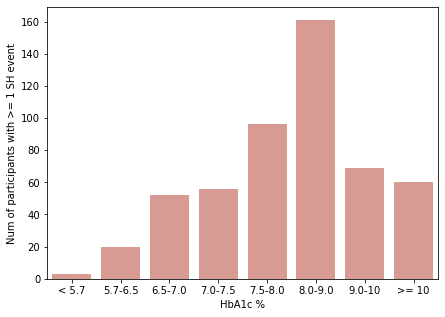

In [39]:
df_sh = df[(df['SHSeizComaPast12mos'] == 0)]
lab = 'diagDuration'
print(df_sh.shape[0])


df_dur = df_sh[(df_sh['HbA1c'] < 5.7)]
less1 = df_dur.shape[0]

df_dur1 = df_sh[(df_sh['HbA1c'] >=5.7) & (df_sh['HbA1c'] < 6.5 ) ]
less57 = df_dur1.shape[0]


df_dur2 = df_sh[(df_sh['HbA1c'] >=6.5) & (df_sh['HbA1c'] < 7.0) ]
less510 = df_dur2.shape[0]

df_dur2 = df_sh[(df_sh['HbA1c'] >=7.0) & (df_sh['HbA1c'] < 7.5 ) ]
less75 = df_dur2.shape[0]

df_dur2 = df_sh[(df_sh['HbA1c'] >=7.5) & (df_sh['HbA1c'] < 8.0 ) ]
less8 = df_dur2.shape[0]

df_dur2 = df_sh[(df_sh['HbA1c'] >=8.0) & (df_sh['HbA1c'] < 9 ) ]
less85 = df_dur2.shape[0]

df_dur3 = df_sh[(df_sh['HbA1c'] >=9) & (df_sh['HbA1c'] < 10 ) ]
less3 = df_dur3.shape[0]

df_dur4 = df_sh[(df_sh['HbA1c'] >=10) ]
less5 = df_dur4.shape[0]



list_dur = [less1,less57,less510, less75, less8, less85,less3, less5]
list_dur
labels = ['< 5.7','5.7-6.5','6.5-7.0','7.0-7.5','7.5-8.0','8.0-9.0','9.0-10','>= 10']

fig, ax = plt.subplots(figsize=(7,5))
ax = sns.barplot(x=labels, y=list_dur, color="salmon", saturation=.5)
plt.ylabel('Num of participants with >= 1 SH event')

plt.title('')
plt.xlabel('HbA1c %')
plt.savefig('shhba1c.png',  bbox_inches = "tight")
plt.show()

1309


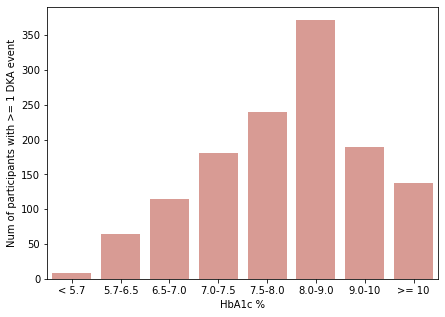

In [38]:
df_sh = df[(df['DKAPast12mos'] == 0)]
print(df_sh.shape[0])


df_dur = df_sh[(df_sh['HbA1c'] < 5.7)]
less1 = df_dur.shape[0]

df_dur1 = df_sh[(df_sh['HbA1c'] >=5.7) & (df_sh['HbA1c'] < 6.5 ) ]
less57 = df_dur1.shape[0]


df_dur2 = df_sh[(df_sh['HbA1c'] >=6.5) & (df_sh['HbA1c'] < 7.0) ]
less510 = df_dur2.shape[0]

df_dur2 = df_sh[(df_sh['HbA1c'] >=7.0) & (df_sh['HbA1c'] < 7.5 ) ]
less75 = df_dur2.shape[0]

df_dur2 = df_sh[(df_sh['HbA1c'] >=7.5) & (df_sh['HbA1c'] < 8.0 ) ]
less8 = df_dur2.shape[0]

df_dur2 = df_sh[(df_sh['HbA1c'] >=8.0) & (df_sh['HbA1c'] < 9 ) ]
less85 = df_dur2.shape[0]

df_dur3 = df_sh[(df_sh['HbA1c'] >=9) & (df_sh['HbA1c'] < 10 ) ]
less3 = df_dur3.shape[0]

df_dur4 = df_sh[(df_sh['HbA1c'] >=10) ]
less5 = df_dur4.shape[0]



list_dur = [less1,less57,less510, less75, less8, less85,less3, less5]
list_dur
labels = ['< 5.7','5.7-6.5','6.5-7.0','7.0-7.5','7.5-8.0','8.0-9.0','9.0-10','>= 10']

fig, ax = plt.subplots(figsize=(7,5))
ax = sns.barplot(x=labels, y=list_dur, color="salmon", saturation=.5)
plt.ylabel('Num of participants with >= 1 DKA event')

plt.title('')
plt.xlabel('HbA1c %')
plt.savefig('dkahba1c.png',  bbox_inches = "tight")
plt.show()




In [ ]:
df_dur = df[(df['HbA1c'] < 5.7)]
less1 = df_dur.shape[0]

df_dur1 = df[(df['HbA1c'] >=5.7) & (df['HbA1c'] < 6.5 ) ]
less57 = df_dur1.shape[0]


df_dur2 = df[(df['HbA1c'] >=6.5) & (df['HbA1c'] < 7.5 ) ]
less510 = df_dur2.shape[0]

df_dur3 = df[(df['HbA1c'] >=7.5) & (df['HbA1c'] < 10 ) ]
less3 = df_dur3.shape[0]

df_dur4 = df[(df['HbA1c'] >=10) ]
less5 = df_dur4.shape[0]



list_dur = [less1,less57,less510, less3, less5]
list_dur
labels = ['< 5.7','5.7-6.5','6.5-7.5','7.5-10','>= 10']

fig, ax = plt.subplots(figsize=(6,5))
ax = sns.barplot(x=labels, y=list_dur, color="salmon", saturation=.5)
plt.ylabel('Number  of participants')

plt.title('Mean HbA1c')
plt.xlabel('HbA1c %')
plt.savefig('hba1cdiag.png',  bbox_inches = "tight")
plt.show()

In [ ]:
a